# 9장 건강 관련 데이터 분석

## 9.4 건강 관련 데이터 분석 연습 문제

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

plt.rc('font', family=font_name)

###문제1

In [2]:
from pandas import *
from numpy import *


happy_life = read_excel('대한민국행복지도_삶의만족도.xlsx')
happy_health = read_excel('대한민국행복지도_건강.xlsx')
happy_safe = read_excel('대한민국행복지도_안전.xlsx')
happy_environ = read_excel('대한민국행복지도_환경.xlsx')
happy_econo = read_excel('대한민국행복지도_경제.xlsx')
happy_edu = read_excel('대한민국행복지도_교육.xlsx')
happy_relation = read_excel('대한민국행복지도_관계및사회참여.xlsx')
happy_leisure = read_excel('대한민국행복지도_여가.xlsx')
happy_leisure.head()

,No,시도,구군,평균,여가활용 만족도 b),노인 천명당 노인여가복지시설수,인구 십만명당 도서관수,인구 십만명당 문화기반시설수,인구 천명당 체육관련 여가시설수
0,1,서울특별시,종로구,0.6331,0.8409,0.1573,0.4523,0.9997,0.5559
1,2,서울특별시,중구,0.6691,0.6224,0.1467,0.5369,0.8441,0.9886
2,3,서울특별시,용산구,0.2817,0.6381,0.1628,0.2453,0.3715,0.2934
3,4,서울특별시,성동구,0.3257,0.5657,0.1859,0.3590,0.2768,0.4859
4,5,서울특별시,광진구,0.3313,0.6740,0.1443,0.2333,0.2058,0.6365


In [3]:
city = list((happy_life[happy_life.시도 == '서울특별시'])['구군'].unique())
happy_merge = DataFrame( {'구군' : city} )
happy_merge

,구군
0,종로구
1,중구
2,용산구
3,성동구
4,광진구
5,동대문구
6,중랑구
7,성북구
8,강북구
9,도봉구


In [4]:
life = happy_life['삶의 만족도'].groupby(by=happy_life['구군']).mean()
happy_merge = merge(happy_merge, life, on='구군')

health = happy_health['평균'].groupby(by=happy_health['구군']).mean()
happy_merge = merge(happy_merge, health.rename('건강'), on='구군')

safe = happy_safe['평균'].groupby(by=happy_safe['구군']).mean()
happy_merge = merge(happy_merge, safe.rename('안전'), on='구군')

environ = happy_environ['평균'].groupby(by=happy_environ['구군']).mean()
happy_merge = merge(happy_merge, environ.rename('환경'), on='구군')

econo = happy_econo['평균'].groupby(by=happy_econo['구군']).mean()
happy_merge = merge(happy_merge, econo.rename('경제'), on='구군')

edu = happy_edu['평균'].groupby(by=happy_edu['구군']).mean()
happy_merge = merge(happy_merge, edu.rename('교육'), on='구군')

relation = happy_relation['평균'].groupby(by=happy_relation['구군']).mean()
happy_merge = merge(happy_merge, relation.rename('관계및사회참여'), on='구군')

leisure = happy_leisure['평균'].groupby(by=happy_leisure['구군']).mean()
happy_merge = merge(happy_merge, leisure.rename('여가'), on='구군')

In [5]:
happy_merge

,구군,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
0,종로구,0.443700,0.922000,0.747000,0.46370,1.000000,0.683900,0.74250,0.6331
1,중구,0.336517,0.714983,0.532967,0.39485,0.676533,0.518717,0.47435,0.4401
2,용산구,0.616100,0.589800,0.553700,0.50300,0.691500,0.267900,0.43170,0.2817
3,성동구,0.472900,0.479400,0.534700,0.41960,0.653300,0.246400,0.41820,0.3257
4,광진구,0.404100,0.637300,0.607200,0.49920,0.444500,0.487900,0.35190,0.3313
5,동대문구,0.584200,0.602400,0.648000,0.30750,0.477000,0.511900,0.13390,0.2329
6,중랑구,0.105800,0.522500,0.542400,0.55230,0.248000,0.153700,0.25110,0.1831
7,성북구,0.638200,0.417700,0.463000,0.49910,0.273200,0.464900,0.35390,0.2670
8,강북구,0.046100,0.398700,0.611900,0.68120,0.131300,0.106300,0.08930,0.2337
9,도봉구,0.217100,0.468300,0.467500,0.55450,0.210400,0.472500,0.52920,0.3076


In [6]:
happy_merge.describe()

,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.486835,0.565945,0.532377,0.466964,0.532879,0.398475,0.396498,0.279384
std,0.225393,0.159688,0.106537,0.086216,0.277260,0.179883,0.152771,0.098483
min,0.046100,0.200450,0.324100,0.307500,0.131300,0.106300,0.089300,0.154800
25%,0.336517,0.478300,0.467500,0.416000,0.285800,0.256050,0.301600,0.231700
50%,0.472900,0.589800,0.532967,0.472600,0.477000,0.395100,0.412300,0.249800
75%,0.641300,0.659600,0.611900,0.503000,0.691500,0.511900,0.489100,0.307600
max,0.925900,0.922000,0.747000,0.681200,1.000000,0.805400,0.742500,0.633100


In [7]:
happy_merge.corr()

,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
삶의 만족도,1.000000,0.278078,0.001577,-0.236015,0.435007,0.560736,0.246283,-0.015894
건강,0.278078,1.000000,0.526684,-0.221940,0.457899,0.408688,0.325174,0.529692
안전,0.001577,0.526684,1.000000,-0.286672,0.233186,-0.024545,-0.215290,0.482690
환경,-0.236015,-0.221940,-0.286672,1.000000,-0.573838,0.038951,0.012447,-0.259865
경제,0.435007,0.457899,0.233186,-0.573838,1.000000,0.233678,0.302810,0.542861
교육,0.560736,0.408688,-0.024545,0.038951,0.233678,1.000000,0.488805,0.286615
관계및사회참여,0.246283,0.325174,-0.215290,0.012447,0.302810,0.488805,1.000000,0.529467
여가,-0.015894,0.529692,0.482690,-0.259865,0.542861,0.286615,0.529467,1.000000


###문제2

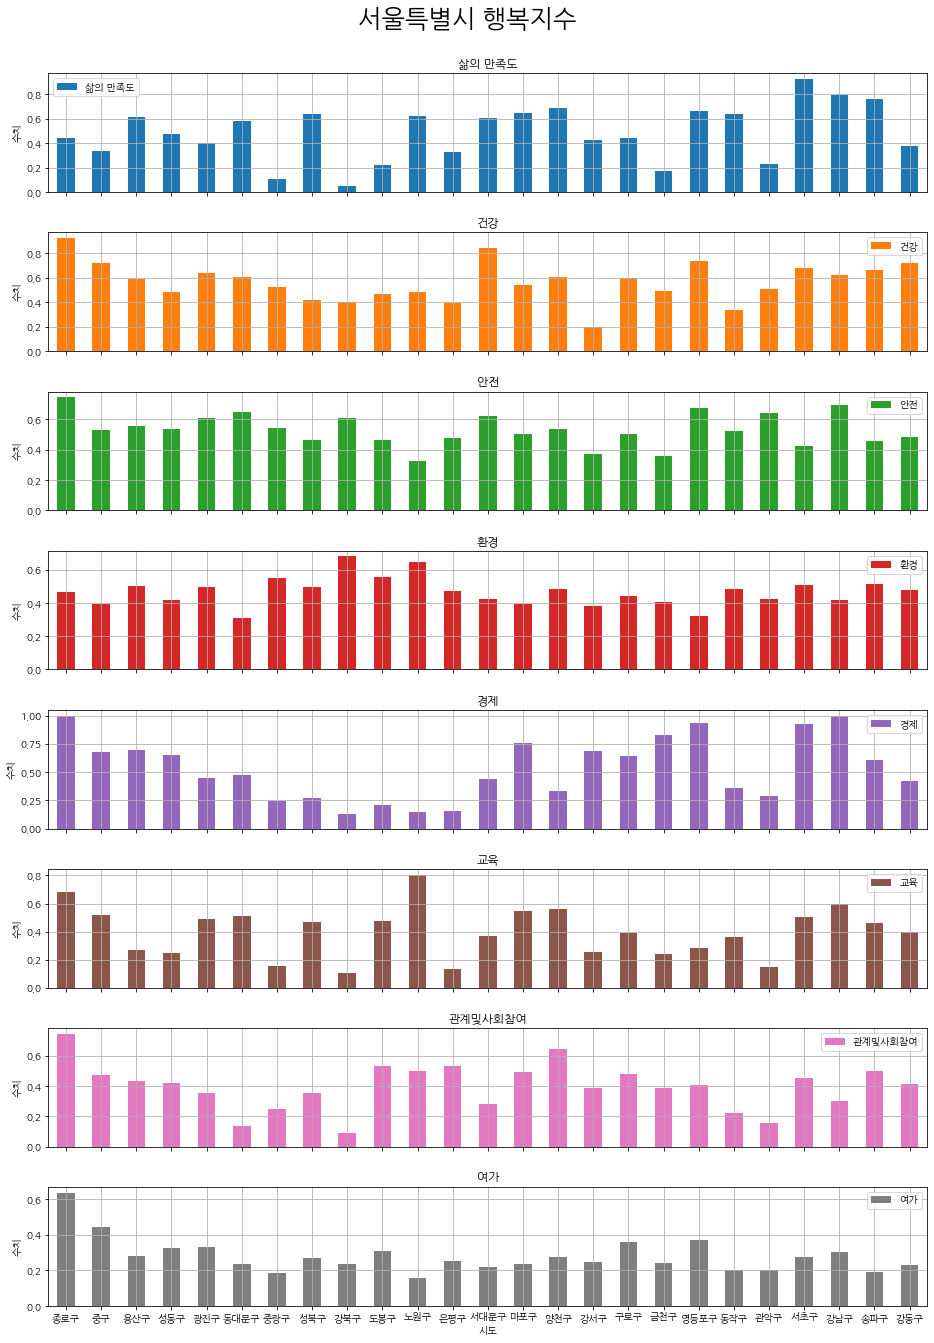

In [9]:
from numpy import *

happy_merge.plot(kind='bar', xlabel='시도', ylabel='수치', figsize=(15,20), grid=True, subplots=True)

plt.suptitle('서울특별시 행복지수', fontsize=25)
plt.tight_layout(pad = 8, h_pad = 2)
plt.xticks(arange(25), city, rotation=360)
plt.show()

###문제3

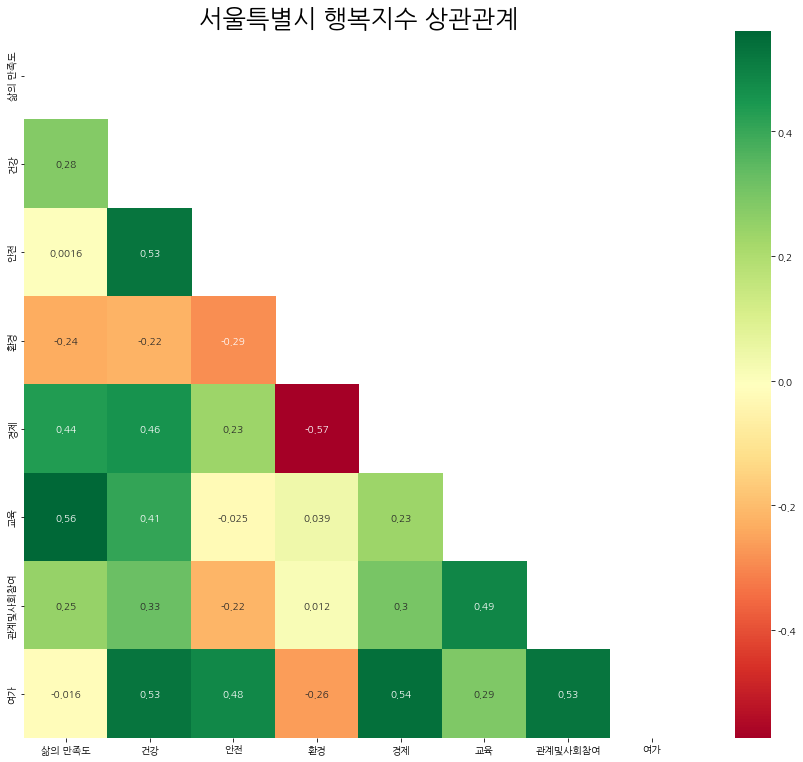

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,13))
plt.title('서울특별시 행복지수 상관관계', fontsize=25)
plt.rc('axes', unicode_minus=False)

correlation_mat = happy_merge.corr()
upp_mat = triu(correlation_mat)

sns.heatmap(correlation_mat, mask=upp_mat, annot=True, cmap='RdYlGn')
plt.show()

###문제4

In [10]:
city = list((happy_life[happy_life.시도 == '부산광역시'])['구군'].unique())
happy_merge_busan = DataFrame( {'구군' : city} )
happy_merge_busan

,구군
0,중구
1,서구
2,동구
3,영도구
4,부산진구
5,동래구
6,남구
7,북구
8,해운대구
9,사하구


In [11]:
life = happy_life['삶의 만족도'].groupby(by=happy_life['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, life, on='구군')

health = happy_health['평균'].groupby(by=happy_health['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, health.rename('건강'), on='구군')

safe = happy_safe['평균'].groupby(by=happy_safe['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, safe.rename('안전'), on='구군')

environ = happy_environ['평균'].groupby(by=happy_environ['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, environ.rename('환경'), on='구군')

econo = happy_econo['평균'].groupby(by=happy_econo['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, econo.rename('경제'), on='구군')

edu = happy_edu['평균'].groupby(by=happy_edu['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, edu.rename('교육'), on='구군')

relation = happy_relation['평균'].groupby(by=happy_relation['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, relation.rename('관계및사회참여'), on='구군')

leisure = happy_leisure['평균'].groupby(by=happy_leisure['구군']).mean()
happy_merge_busan = merge(happy_merge_busan, leisure.rename('여가'), on='구군')

In [12]:
happy_merge_busan

,구군,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
0,중구,0.336517,0.714983,0.532967,0.394850,0.676533,0.518717,0.474350,0.440100
1,서구,0.262820,0.556820,0.366980,0.488525,0.402360,0.596920,0.376575,0.198440
2,동구,0.308517,0.549083,0.436920,0.541083,0.496667,0.609550,0.441650,0.300267
3,영도구,0.227300,0.418100,0.440100,0.550800,0.221700,0.408700,0.009400,0.124300
4,부산진구,0.423900,0.598900,0.288300,0.456300,0.459800,0.599500,0.127000,0.119300
5,동래구,0.643700,0.724600,0.455100,0.405200,0.383100,0.599900,0.483300,0.065500
6,남구,0.420425,0.620525,0.463300,0.401175,0.388850,0.666050,0.426475,0.253375
7,북구,0.415500,0.358075,0.290025,0.598875,0.379575,0.674925,0.634125,0.390500
8,해운대구,0.631400,0.327800,0.394200,0.650800,0.336000,0.598900,0.378300,0.126700
9,사하구,0.110400,0.361000,0.143600,0.197600,0.283100,0.716500,0.378800,0.090900


In [13]:
happy_merge_busan.head()

,구군,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
0,중구,0.336517,0.714983,0.532967,0.394850,0.676533,0.518717,0.474350,0.440100
1,서구,0.262820,0.556820,0.366980,0.488525,0.402360,0.596920,0.376575,0.198440
2,동구,0.308517,0.549083,0.436920,0.541083,0.496667,0.609550,0.441650,0.300267
3,영도구,0.227300,0.418100,0.440100,0.550800,0.221700,0.408700,0.009400,0.124300
4,부산진구,0.423900,0.598900,0.288300,0.456300,0.459800,0.599500,0.127000,0.119300


In [14]:
happy_merge_busan.corr()

,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
삶의 만족도,1.000000,0.008426,0.377289,0.397642,0.019127,0.078345,0.445796,-0.047536
건강,0.008426,1.000000,0.220567,-0.206558,0.076338,0.347876,-0.055748,-0.093309
안전,0.377289,0.220567,1.000000,0.214805,0.179693,-0.383915,0.120182,0.375980
환경,0.397642,-0.206558,0.214805,1.000000,-0.168107,0.037792,0.274982,0.479295
경제,0.019127,0.076338,0.179693,-0.168107,1.000000,-0.441745,0.199334,0.350187
교육,0.078345,0.347876,-0.383915,0.037792,-0.441745,1.000000,0.406218,-0.056750
관계및사회참여,0.445796,-0.055748,0.120182,0.274982,0.199334,0.406218,1.000000,0.542484
여가,-0.047536,-0.093309,0.375980,0.479295,0.350187,-0.056750,0.542484,1.000000


###문제5

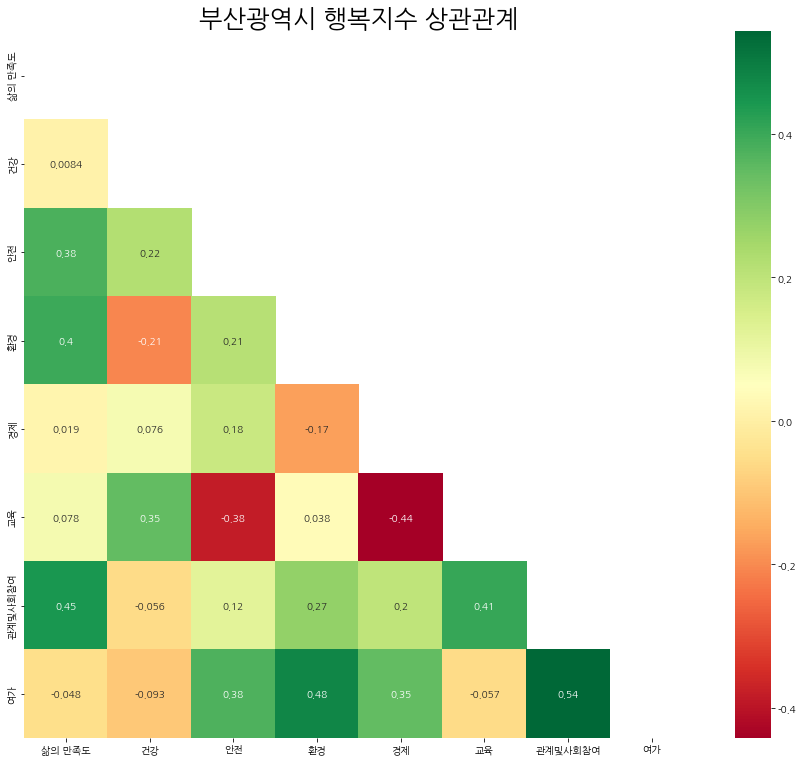

In [17]:
import seaborn as sns

plt.figure(figsize=(15,13))
plt.title('부산광역시 행복지수 상관관계', fontsize=25)
plt.rc('axes', unicode_minus=False)

correlation_mat = happy_merge_busan.corr()
upp_mat = triu(correlation_mat)

sns.heatmap(correlation_mat, mask=upp_mat, annot=True, cmap='RdYlGn')
plt.show()